/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


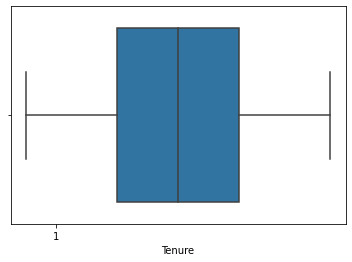

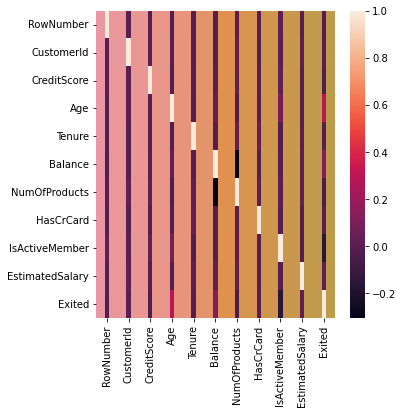

In [5]:
import pandas as pd
import numpy as np
import sklearn
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
import seaborn as sns
import matplotlib.pyplot as plt
data.head()
data.tail()
plt.boxplot(data['Age'])
sns.boxplot(data['Tenure'])
# Univariate Analysis
sns.displot(data['Age'])
sns.lineplot(x="Age",y="Balance",data=data)
#Bi-Variate Analysis
sns.barplot(x='Age',y='Balance',data=data)
sns.countplot(x='Age',data=data)
# multivariate analysis
corr_matrix=data.corr()
sns.heatmap(corr_matrix)



In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


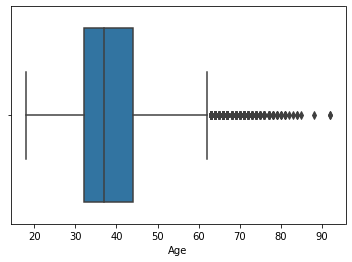

In [8]:
import seaborn as sns
sns.boxplot(data['Age'])

In [11]:
# upper extreme =q3+1.5*IQR
#lower extreme=q1-1.5*IQR
# IQR=q3-q1
qnt=data.quantile(q=[0.25,0.75])
qnt
IQR =qnt.loc[0.75]-qnt.loc[0.25]
IQR
upper_extreme=qnt.loc[0.75]+1.5*IQR
upper_extreme
lower_extreme=qnt.loc[0.25]-1.5*IQR
lower_extreme

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [12]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(missing_values=np.nan,strategy='main')
data[data['Age']>88]
data[data['Age']>92]
# replacing outlier with mean
data['Age']=np.where(data['Age']>88,data['Age'].mean(),data['Age'])
data[data['Age']>88]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Surname']=le.fit_transform(data['Surname'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [14]:
# separate the dependent and independent variables
y=data['Exited']
x=data.drop(columns=['Exited'],axis=1)
names=x.columns
names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [15]:
# scale the independent variable
from sklearn.preprocessing import scale
x
x=pd.DataFrame(x,columns=names)
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,France,Female,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,France,Female,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,France,Female,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10


In [16]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape
x_test.shape

(2000, 13)